In [1]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

%matplotlib inline

plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") 
sns.set(style="whitegrid", color_codes=True)

from ggplot import *

E:\anaconda\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


In [2]:
df_red = pd.read_csv("C:/Users/Juhi Deshpande/Documents/Wine Quality Exploration and Analysis/winequality-red.csv",sep=";")
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df_red.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid','volatile acidity':'volatile_acidity','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

In [4]:
df_red.isnull().sum()
df_red.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
print("red mean =",df_red["quality"].mean())

red mean = 5.6360225140712945


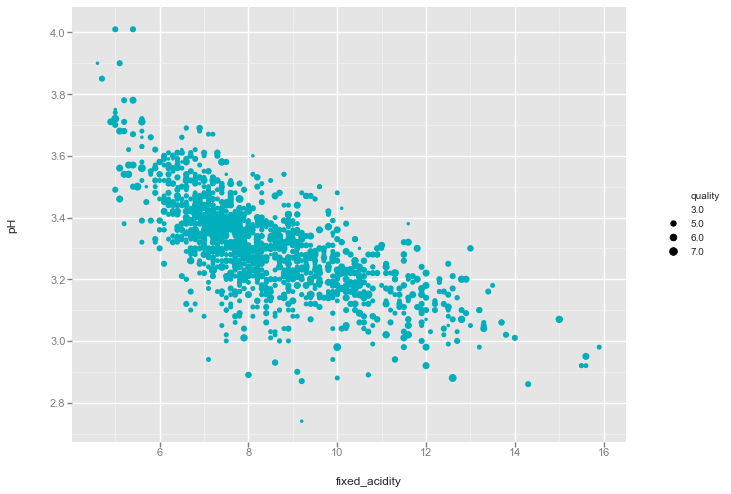

<ggplot: (127251115461)>

In [12]:
ggplot(df_red, aes(x='fixed_acidity', y='pH', size='quality')) + geom_point(color = "#00AFBB")

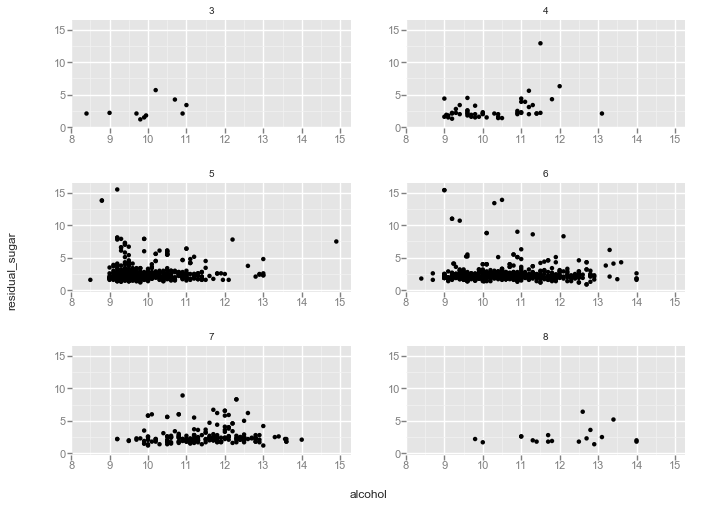

<ggplot: (-9223371909604622781)>

In [13]:
ggplot(df_red, aes(x='alcohol', y='residual_sugar')) + geom_point() +\
    facet_wrap('quality', ncol=2) + scale_color_brewer(type = 'qual', palette = 'Pastel2')

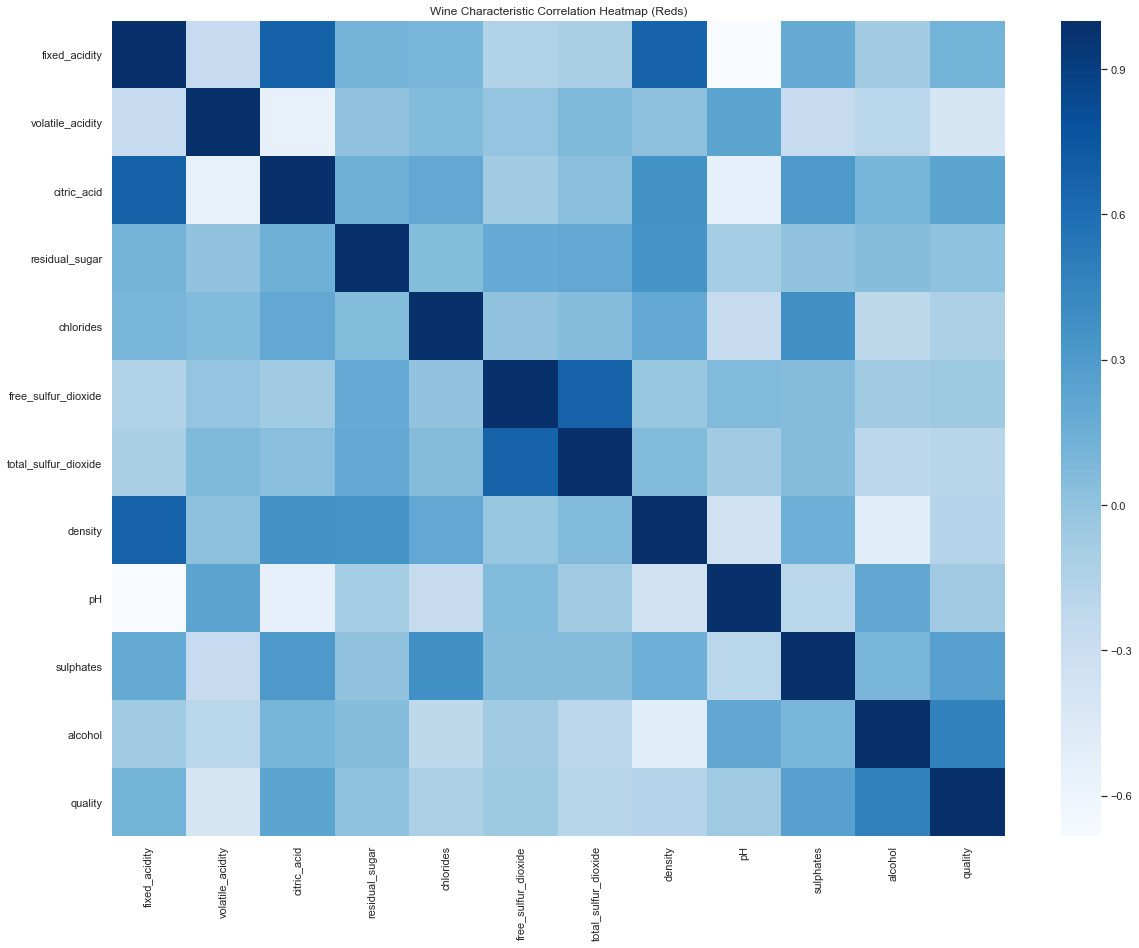

In [14]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Wine Characteristic Correlation Heatmap (Reds)")
corr = df_red.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="Blues")
plt.show()

In [15]:
df_r_corr=df_red.corr()
df_r_corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [19]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_red, test_size=0.2, random_state=4) 
print (train.shape, test.shape)

(1279, 12) (320, 12)


In [24]:
y = train["quality"]
cols = ["total_sulfur_dioxide","free_sulfur_dioxide","residual_sugar","fixed_acidity","volatile_acidity","alcohol","sulphates","pH","density"]

X=train[cols]

In [25]:
regr = linear_model.LinearRegression()
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
ytrain_pred = regr.predict(X)
print("In-sample Mean squared error: %.2f"
      % mean_squared_error(y, ytrain_pred))

In-sample Mean squared error: 0.42


In [27]:
ytest = test["quality"]
cols = ["total_sulfur_dioxide","free_sulfur_dioxide","residual_sugar","fixed_acidity","volatile_acidity","alcohol","sulphates","pH","density"]

Xtest=test[cols]

In [28]:
ypred = regr.predict(Xtest)
print("Out-of-sample Mean squared error: %.2f"
      % mean_squared_error(ytest, ypred))

#this mean squared error is not much higher than the train model which indicates that there is not much overfitting

Out-of-sample Mean squared error: 0.43


In [30]:
#Alternative : Support Vector Machine
from sklearn import svm

y = train["quality"]
cols = ["total_sulfur_dioxide","free_sulfur_dioxide","residual_sugar","fixed_acidity","volatile_acidity","alcohol","sulphates","pH"]
X=train[cols]

clf = svm.SVR(C=1.0, epsilon=0.2)
clf.fit(X, y) 


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [31]:
ytrain_pred = clf.predict(X)
print("In-sample Mean squared error: %.2f"
      % mean_squared_error(y, ytrain_pred))
#the MSE is lower for SVM compared to Linear Regression

In-sample Mean squared error: 0.22


In [32]:
ytest = test["quality"]
Xtest=test[cols]
ypred = clf.predict(Xtest)
print("Out-of-sample Mean squared error: %.2f"
      % mean_squared_error(ytest, ypred))
#Cross validation results can be improved by tuning hyperparameters

Out-of-sample Mean squared error: 0.45
